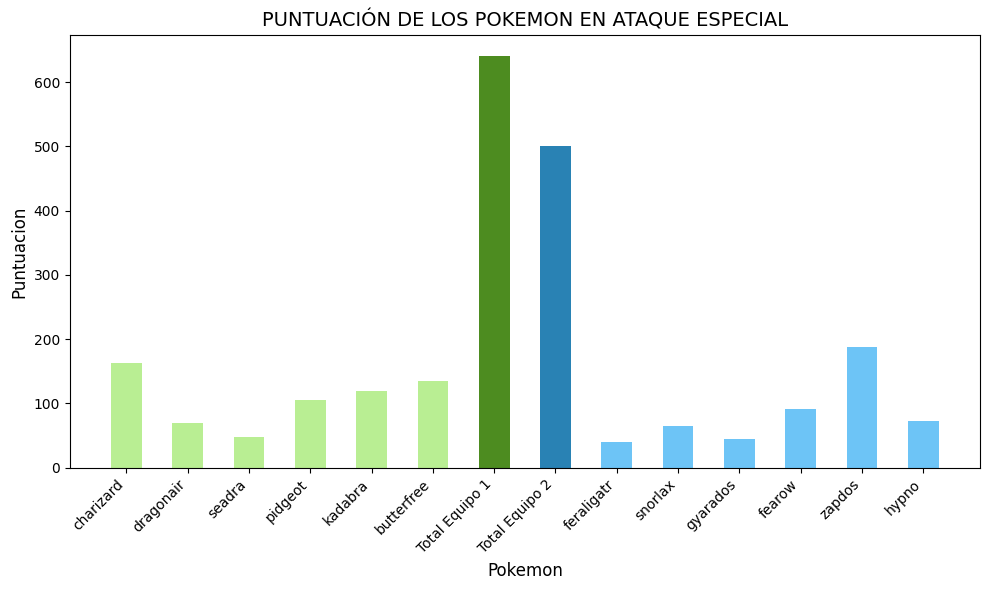

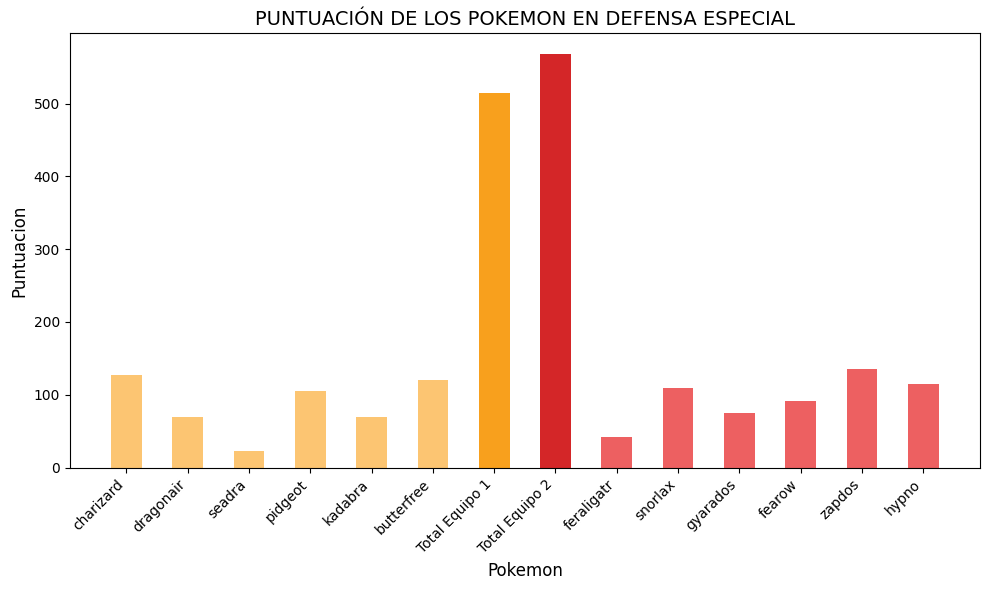

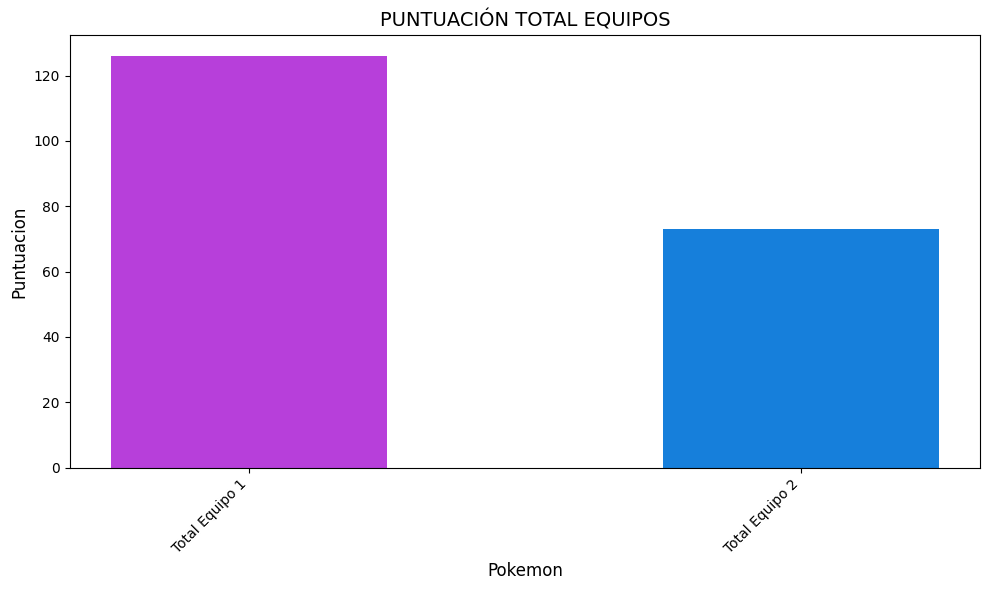

El pokemon del equipo 1 con peor puntuacion es dragonair y su puntuacion es 0
El pokemon del equipo 2 con peor puntuacion es snorlax y su puntuacion es -45


In [55]:
#AMPLIACIÓN PRÁCTICA MINERIA DE TEXTOS
#POR ELENA MAÑUECO CUBILLO. CURSO: 2024-2025

import requests
import matplotlib.pyplot as plt
import numpy as np

#Equipos que camos a comparar
equipo_1=["charizard", "dragonair", "seadra", "pidgeot", "kadabra", "butterfree"]
equipo_2=["feraligatr", "snorlax", "gyarados", "fearow", "zapdos", "hypno"]

#Estas son las ventajas y desventajas con las que vamos a valorar el multiplicador.
ventajas = ["fire", "flying", "poison", "ice", "bug"]
desventajas = ["water", "rock", "ground"]

#Obtenemos los datos de los pokemon, si se obtienen los datos, se duevuelven y si no se encuentran se duevuelve un mensaje de error
def datos_pokemon(nombre):
  url = f"https://pokeapi.co/api/v2/pokemon/{nombre}"
  response = requests.get(url)

  if response.status_code==200:
    return response.json()

  else:
    print(f"No se pudo obtener información de {nombre}")
    return None

#Se calcula el multiplicador en base a las ventajas(*1.5) y desventajas(*0.5), en caso de haber dos opciones, se hace una media
def multiplicador(pokemon):
  datos = datos_pokemon(pokemon)
  if datos:
    poder=[tipo['type']['name'] for tipo in datos['types']]
    if len(poder)==2:
      if poder[0]==poder[1]:
        if poder[0] in ventajas:
          return 1.5
        elif poder[0] in desventajas:
          return 0.5
        else:
          return 1
      elif poder[0] != poder[1]:
        if poder[0] in ventajas:
          if poder[1] in desventajas:
            return 1.5*0.5
          else:
            return 1.5
        elif poder[0] in desventajas:
          if poder[1] in ventajas:
            return 0.5*1.5
          else:
            return 0.5
        elif poder[0] not in ventajas and poder[0] not in desventajas:
          if poder[1] in ventajas:
            return 1.5
          elif poder[1] in desventajas:
            return 0.5
          else:
            return 1
    else:
      if poder[0] in ventajas:
        return 1.5
      elif poder[0] in desventajas:
        return 0.5
      else:
        return 1

#Se calcula la puntuación de ataque especial, sacando la puntuación y multiplicandola por el multiplicador
def puntuacion_ataque(pokemon):
  datos= datos_pokemon(pokemon)
  if datos:
    puntuacion_ataque=0
    for stat in datos["stats"]:
      if stat["stat"]["name"] == "special-attack":
        puntuacion_ataque = stat["base_stat"]
  mult = multiplicador(pokemon)
  return puntuacion_ataque*mult

#Se hace lo mismo con la puntuación de defensa
def puntuacion_defensa(pokemon):
  datos= datos_pokemon(pokemon)
  if datos:
    puntuacion_defensa=0
    for stat in datos["stats"]:
      if stat["stat"]["name"] == "special-defense":
        puntuacion_defensa = stat["base_stat"]
  mult = multiplicador(pokemon)
  return puntuacion_defensa*mult

#Se suman todas las puntuaciones de ataque del equipo
def equipo_ataque(equipo):
  puntuacion = 0
  for pokemon in equipo:
   puntuacion+= puntuacion_ataque(pokemon)
  return puntuacion

#Se suman todas las puntuaciones de defensa del equipo
def equipo_defensa(equipo):
  puntuacion = 0
  for pokemon in equipo:
   puntuacion+= puntuacion_defensa(pokemon)
  return puntuacion

#Se hace un gráfico con la puntuación del ataque
def grafico_ataque(equipo_1, equipo_2):
  punt_eq1= equipo_ataque(equipo_1)
  punt_eq2= equipo_ataque(equipo_2)

  equipos_combinados= equipo_1 + ['Total Equipo 1'] + ['Total Equipo 2'] + equipo_2
  puntuaciones=[puntuacion_ataque(pokemon) for pokemon in equipo_1]+[punt_eq1]+[punt_eq2]+[puntuacion_ataque(pokemon) for pokemon in equipo_2]

  co=np.arange(len(equipos_combinados))
  colores=['#b9ee93']*len(equipo_1)+['#4d8c20']+['#2982b4']+['#6dc4f6']*len(equipo_2)
  an=0.5
  fig,ax= plt.subplots(figsize=(10,6))
  ax.bar(co, puntuaciones, an, color=colores)

  ax.set_xlabel('Pokemon', fontsize=12)
  ax.set_ylabel('Puntuacion', fontsize=12)
  ax.set_title('PUNTUACIÓN DE LOS POKEMON EN ATAQUE ESPECIAL', fontsize=14)
  ax.set_xticks(co)
  ax.set_xticklabels(equipos_combinados, rotation=45, ha='right', fontsize=10)

  plt.tight_layout()
  plt.show()

#A si mismo, se hace un gráfico, en este caso con la defensa, para comparar las puntuaciones de ambos equipos
def grafico_defensa(equipo_1, equipo_2):
  punt_eq1= equipo_defensa(equipo_1)
  punt_eq2= equipo_defensa(equipo_2)

  equipos_combinados= equipo_1 + ['Total Equipo 1'] + ['Total Equipo 2'] + equipo_2
  puntuaciones=[puntuacion_defensa(pokemon) for pokemon in equipo_1]+[punt_eq1]+[punt_eq2]+[puntuacion_defensa(pokemon) for pokemon in equipo_2]

  co=np.arange(len(equipos_combinados))
  colores=['#FCC572']*len(equipo_1)+['#F8A01D']+['#D42628']+['#ED6061']*len(equipo_2)
  an=0.5
  fig,ax= plt.subplots(figsize=(10,6))
  ax.bar(co, puntuaciones, an, color=colores)

  ax.set_xlabel('Pokemon', fontsize=12)
  ax.set_ylabel('Puntuacion', fontsize=12)
  ax.set_title('PUNTUACIÓN DE LOS POKEMON EN DEFENSA ESPECIAL', fontsize=14)
  ax.set_xticks(co)
  ax.set_xticklabels(equipos_combinados, rotation=45, ha='right', fontsize=10)

  plt.tight_layout()
  plt.show()

#Y por último un gráfico que muesttra la puntuación final de cada equipo
def grafico_final(equipo_1, equipo_2):
  punt_eq1= equipo_ataque(equipo_1) - equipo_defensa(equipo_1)
  punt_eq2= equipo_ataque(equipo_1) - equipo_defensa(equipo_2)

  equipos_combinados= ['Total Equipo 1'] + ['Total Equipo 2']
  puntuaciones=[punt_eq1]+[punt_eq2]

  co=np.arange(len(equipos_combinados))
  colores=['#B73FDA']+['#167FDB']
  an=0.5
  fig,ax= plt.subplots(figsize=(10,6))
  ax.bar(co, puntuaciones, an, color=colores)

  ax.set_xlabel('Pokemon', fontsize=12)
  ax.set_ylabel('Puntuacion', fontsize=12)
  ax.set_title('PUNTUACIÓN TOTAL EQUIPOS', fontsize=14)
  ax.set_xticks(co)
  ax.set_xticklabels(equipos_combinados, rotation=45, ha='right', fontsize=10)

  plt.tight_layout()
  plt.show()

#Por último, se calcula cual es el peor pokemon de cada equipo basándonos en ambas puntuaciones
def peor_pokemon(equipo):
  puntuacion_menor=100
  pokemon_peor= None
  if equipo==equipo_1:
    equipo_nombre="equipo 1"
  elif equipo==equipo_2:
    equipo_nombre="equipo 2"
  for pokemon in equipo:
    datos= datos_pokemon(pokemon)
    if datos:
      puntuacion= puntuacion_ataque(pokemon)-puntuacion_defensa(pokemon)
      if(puntuacion<puntuacion_menor):
        puntuacion_menor=puntuacion
        pokemon_peor=pokemon
  print(f"El pokemon del {equipo_nombre} con peor puntuacion es {pokemon_peor} y su puntuacion es {puntuacion_menor}")


grafico_ataque(equipo_1, equipo_2)
grafico_defensa(equipo_1, equipo_2)
grafico_final(equipo_1, equipo_2)
peor_pokemon(equipo_1)
peor_pokemon(equipo_2)
